# < 3Ï£ºÏ∞® Í≥ºÏ†ú 1 : MLP ÎßàÏùåÎåÄÎ°ú Îã§Î§ÑÎ≥¥Í∏∞>
- datasetÏùÑ ÏûÑÏùòÎ°ú ÏÑ†Ï†ïÌï¥ÏÑú ÏßÅÏ†ë Î∂ÑÏÑù Ìï¥Î≥¥Í∏∞(Ï†úÍ≥µÌïú ÏΩîÎìúÎ•º ÌôúÏö©Ìï¥ÏÑú Ìï¥Î≥¥Í∏∞) : load_digits(), load_wine() Ï§ë ÏÑ†ÌÉù
- activation functions Ï§ë reluÏÇ¨Ïö©Ïãú Ìï®Ïàò ÏßÅÏ†ë Ï†ïÏùò
- ÎßàÏùåÎåÄÎ°ú Î∞îÍøîÎ≥¥Í∏∞
  + activation function
  + lr
  + optimizer
  + hidden layer/neuron Ïàò 
- Ï†ÑÏ≤òÎ¶¨ÎèÑ Ï∂îÍ∞Ä
- Î™®Îì† ÏãúÎèÑÎ•º Ïò¨Î†§Ï£ºÏÑ∏Ïöî!
- Ï†úÏùº ÎÜíÏùÄ accÎ•º Î≥¥Ïù∏ ÏãúÎèÑÎ•º Î™ÖÏãúÌï¥Ï£ºÏÑ∏Ïöî!




In [364]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## ÏïÑÎûò Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ë ÏõêÌïòÎäî Îç∞Ïù¥ÌÑ∞ÏÖã ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÏó¨, ÏΩîÎìú Í≥ºÏ†ú ÏßÑÌñâÌïòÍ∏∞!
- 1) load_digits() <br>
- 2) load_wine()

In [386]:
from sklearn.datasets import load_digits

In [387]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Ï¢ÖÎ•ò : load_digits()
data = load_digits()

In [388]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [389]:
input = data.data
output = data.target

In [369]:
#DFÌôî
import pandas as pd
import numpy as np
d_data = data.data
d_target = data.target
d_df = pd.DataFrame(data = d_data, columns=[data.feature_names])
d_df['target'] = data.target
d_df

pixel_0_0 pixel_0_1 pixel_0_2 pixel_0_3 pixel_0_4 pixel_0_5 pixel_0_6  \
0          0.0       0.0       5.0      13.0       9.0       1.0       0.0   
1          0.0       0.0       0.0      12.0      13.0       5.0       0.0   
2          0.0       0.0       0.0       4.0      15.0      12.0       0.0   
3          0.0       0.0       7.0      15.0      13.0       1.0       0.0   
4          0.0       0.0       0.0       1.0      11.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1792       0.0       0.0       4.0      10.0      13.0       6.0       0.0   
1793       0.0       0.0       6.0      16.0      13.0      11.0       1.0   
1794       0.0       0.0       1.0      11.0      15.0       1.0       0.0   
1795       0.0       0.0       2.0      10.0       7.0       0.0       0.0   
1796       0.0       0.0      10.0      14.0       8.0       1.0       0.0   

     pixel_0_7 pixel_1_0 pixel_1_1  ... pixel_6_7 pixel_7_0 pixel_7_1  \
0          0.0       0.0       0.0  ...       0.0       0.0       0.0   
1          0.0       0.0       0.0  ...       0.0       0.0       0.0   
2          0.0       0.0       0.0  ...       0.0       0.0       0.0   
3          0.0       0.0       8.0  ...       0.0       0.0       0.0   
4          0.0       0.0       0.0  ...       0.0       0.0       0.0   
...        ...       ...       ...  ...       ...       ...       ...   
1792       0.0       0.0       1.0  ...       0.0       0.0       0.0   
1793       0.0       0.0       0.0  ...       0.0       0.0       0.0   
1794       0.0       0.0       0.0  ...       0.0       0.0       0.0   
1795       0.0       0.0       0.0  ...       0.0       0.0       0.0   
1796       0.0       0.0       2.0  ...       0.0       0.0       1.0   

     pixel_7_2 pixel_7_3 pixel_7_4 pixel_7_5 pixel_7_6 pixel_7_7 target  
0          6.0      13.0      10.0       0.0       0.0       0.0      0  
1          0.0      11.0      16.0      10.0       0.0       0.0      1  
2          0.0       3.0      11.0      16.0       9.0       0.0      2  
3          7.0      13.0      13.0       9.0       0.0       0.0      3  
4          0.0       2.0      16.0       4.0       0.0       0.0      4  
...        ...       ...       ...       ...       ...       ...    ...  
1792       2.0      14.0      15.0       9.0       0.0       0.0      9  
1793       6.0      16.0      14.0       6.0       0.0       0.0      0  
1794       2.0       9.0      13.0       6.0       0.0       0.0      8  
1795       5.0      12.0      16.0      12.0       0.0       0.0      9  
1796       8.0      12.0      14.0      12.0       1.0       0.0      8  

[1797 rows x 65 columns]

In [390]:
d_df['target'].value_counts().sort_index()

(target,)
0            178
1            182
2            177
3            183
4            181
5            182
6            181
7            179
8            174
9            180
dtype: int64

reluÏÇ¨Ïö©Ïãú Ìï®Ïàò ÏßÅÏ†ë Ï†ïÏùò

In [391]:
def relu(x):
  return np.maximum(0, x)
def relu_prime(x):
  if x>0 :
    return 1
  else:
    return 0

In [392]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [393]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# Îç∞Ïù¥ÌÑ∞Î•º tensorÎ°ú Î∞îÍøîÏ£ºÍ≥† gpu Ïó∞ÏÇ∞Ïù¥ Í∞ÄÎä•Ìï¥ÏßÄÎèÑÎ°ù gpuÏóê ÏòÆÍπÄ
# label Í∞íÏùÑ Ïôú long Ïóê ÏòÆÍ≤®ÎÜìÎäîÍ∞Ä? loss functionÏù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏ 

CrossEntropyLoss ÏÇ¨Ïö© Ïãú targetÏùÄ [torch.LongTensor](https://jdhao.github.io/2017/11/15/pytorch-datatype-note/) Ïù¥Ïñ¥ÏïºÌï®.

**Tensor and scalar operation**

- FloatTensor: int/ floatÎ°ú Ïó∞ÏÇ∞ Í∞ÄÎä•(Í≥±, Ìï©, ÎÇòÎàÑÍ∏∞ Îì±) 
- LongTensor: floatÍ∞Ä ÏïÑÎãå intÎ°ú Ïó∞ÏÇ∞ Í∞ÄÎä•.

**Why do some losses require target to be LongTensor?**

According to PyTorch developers, some use cases requires that the target be LongTensor type and int just can not hold the target value.

: Í∞úÎ∞úÏûêÍ∞Ä Í∑∏Î†áÍ≤å ÌïòÎûò..

In [394]:
print(input.shape, output.shape)
print(x_train[0])
print(y_train[0])

#input 64Í∞ú (ÏÜçÏÑ±Ïù¥ 64Í∞ú)
#yÏùò classÎäî 10Í∞ú (0~9)

(1797, 64) (1797,)
tensor([ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,  7.,
         0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,
         0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,  0.,  0.,  0.,
        15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  8.,  0.,  0.], device='cuda:0')
tensor(0, device='cuda:0')


ÌååÏù¥ÌÜ†ÏπòÏóêÏÑú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï¢Ä Îçî ÏâΩÍ≤å Îã§Î£∞ Ïàò ÏûàÎèÑÎ°ù Ïú†Ïö©Ìïú ÎèÑÍµ¨

: **torch.utils.data.Dataset**  ->  **torch.utils.data.DataLoader**
 
: ÎØ∏Îãà Î∞∞Ïπò ÌïôÏäµ, Îç∞Ïù¥ÌÑ∞ ÏÖîÌîå(shuffle), Î≥ëÎ†¨ Ï≤òÎ¶¨ÍπåÏßÄ Í∞ÑÎã®Ìûà ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§. 

: Í∏∞Î≥∏Ï†ÅÏù∏ ÏÇ¨Ïö© Î∞©Î≤ï: DatasetÏùÑ Ï†ïÏùòÌïòÍ≥†, Ïù¥Î•º DataLoaderÏóê Ï†ÑÎã¨ÌïòÎäî Í≤É
- init : class ÏóêÏÑú Í∞ùÏ≤¥Í∞Ä ÏÉùÏÑ±ÎêòÎ©¥ Î∞îÎ°ú Ïã§ÌñâÎêòÎäî Ìï®Ïàò
- len : observation ÏàòÎ•º Ï†ïÏùòÌïòÎäî Ìï®Ïàò
- getitem : iteration ÎßàÎã§ Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º ÎèåÎ†§Ï£ºÎäî Ìï®Ïàò

In [395]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤òÎ¶¨Î•º Ìï¥Ï£ºÎäî Î∂ÄÎ∂Ñ

  def __len__(self):
    return len(self.x_data)
#  Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∏∏Ïù¥. Ï¶â, Ï¥ù ÏÉòÌîåÏùò ÏàòÎ•º Ï†ÅÏñ¥Ï£ºÎäî Î∂ÄÎ∂Ñ

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌäπÏ†ï 1Í∞úÏùò ÏÉòÌîåÏùÑ Í∞ÄÏ†∏Ïò§Îäî Ìï®Ïàò

    return x,y

# !batch_size

In [396]:
batch_size = 8
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

In [218]:
# input_layerÏôÄ hidden_layerÏùò ÎÖ∏Îìú Í∞úÏàòÎ•º Ïñ¥ÎñªÍ≤å Î∞îÍøîÏ§òÏïºÌï†Íπå? 
# hidden layer/neuron ÏàòÎ•º Î∞îÍæ∏Í∏∞
# 1-1. 
model = nn.Sequential(
          nn.Linear(64,398, bias=True), 
          nn.Sigmoid(),
          nn.Linear(398,60, bias=True),
          nn.Sigmoid(),
          nn.Linear(60,30, bias=True), 
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [231]:
# 1-2. Ï∏µ ÌïòÎÇò Ï§ÑÏù¥Í∏∞
model = nn.Sequential(
          nn.Linear(64,398, bias=True), 
          nn.Sigmoid(),
          nn.Linear(398,30, bias=True),
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [241]:
# 1-2-1. Ï∏µ Îâ¥Îü∞ Ïàò Î∞îÍæ∏Í∏∞(Ï§ÑÏù¥Í∏∞)
model = nn.Sequential(
          nn.Linear(64,150, bias=True), 
          nn.Sigmoid(),
          nn.Linear(250,30, bias=True),
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [ ]:
# 1-2-2. Ï∏µ Îâ¥Îü∞ Ïàò Î∞îÍæ∏Í∏∞(Ï§ÑÏù¥Í∏∞)
model = nn.Sequential(
          nn.Linear(64,500, bias=True), 
          nn.Sigmoid(),
          nn.Linear(500,30, bias=True),
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [397]:
# 1-2-2-1. ÌôúÏÑ±ÌôîÌï®Ïàò Î∞îÍæ∏Í∏∞(Relu)
model = nn.Sequential(
          nn.Linear(64,500, bias=True), 
          nn.ReLU(),
          nn.Linear(500,30, bias=True),
          nn.ReLU(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [282]:
# 1-3.ÌôúÏÑ±Ìôî Ìï®Ïàò Î∞îÍæ∏Í∏∞(ReLu)
model = nn.Sequential(
          nn.Linear(64,398, bias=True), 
          nn.ReLU(),
          nn.Linear(398,60, bias=True),
          nn.ReLU(),
          nn.Linear(60,30, bias=True), 
          nn.ReLU(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

classÎ°ú Íµ¨ÌòÑ Í∞ÄÎä•
- init : Ï¥àÍ∏∞ ÏÉùÏÑ± Ìï®Ïàò
- foward : ÏàúÏ†ÑÌåå(ÏûÖÎ†•Í∞í => ÏòàÏ∏°Í∞í Ïùò Í≥ºÏ†ï)

#!Î™®Îç∏(ÌûàÎì†Î†àÏù¥Ïñ¥/Îâ¥Îü∞ Ïàò)

In [219]:
# 1-1 
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,398, bias=True), # input_layer = 64, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(398,60, bias=True), # hidden_layer1 = 398, hidden_layer2 = 60
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(60,30, bias=True), # hidden_layer2 = 60, hidden_layer3 = 30
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(30, 10, bias=True), # hidden_layer3 = 30, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [232]:
# 1-2. Ï∏µ ÌïòÎÇò Ï§ÑÏù¥Í∏∞
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,398, bias=True), # input_layer = 64, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(398,30, bias=True), # hidden_layer1 = 398, hidden_layer2 = 30
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer2 = 30, output_layer = 10
        nn.Sigmoid()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [242]:
# 1-2-1. Ï∏µ  Îâ¥Îü∞ Ïàò Î∞îÍæ∏Í∏∞(Ï§ÑÏù¥Í∏∞)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,150, bias=True), # input_layer = 64, hidden_layer1 = 150
          nn.Sigmoid(),
        nn.BatchNorm1d(150)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(150,30, bias=True), # hidden_layer1 = 150, hidden_layer2 = 30
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer2 = 30, output_layer = 10
        nn.Sigmoid()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [251]:
# 1-2-2. Ï∏µ  Îâ¥Îü∞ Ïàò Î∞îÍæ∏Í∏∞(ÎäòÏù¥Í∏∞)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,500, bias=True), # input_layer = 64, hidden_layer1 = 500
          nn.Sigmoid(),
        nn.BatchNorm1d(500)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(500,30, bias=True), # hidden_layer1 = 500, hidden_layer2 = 30
                  nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer1 = 30, output_layer = 30
        nn.Sigmoid()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [398]:
# 1-2-2-1. ÌôúÏÑ±ÌôîÌï®Ïàò Î∞îÍæ∏Í∏∞(ReLu)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,500, bias=True), # input_layer = 64, hidden_layer1 = 500
          nn.ReLU(),
        nn.BatchNorm1d(500)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(500,30, bias=True), # hidden_layer1 = 500, hidden_layer2 = 30
                  nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer1 = 30, output_layer = 30
        nn.ReLU()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [283]:
# 1-3. ÌôúÏÑ±ÌôîÌï®Ïàò Î∞îÍæ∏Í∏∞(ReLu)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,398, bias=True), # input_layer = 64, hidden_layer1 = 398 
          nn.ReLU(),
        nn.BatchNorm1d(398)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(398,60, bias=True), # hidden_layer1 = 398, hidden_layer2 = 60
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(60,30, bias=True), # hidden_layer2 = 60, hidden_layer3 = 30
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(30, 10, bias=True), # hidden_layer3 = 30, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [399]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavierÏÇ¨Ïö©
        # LayerÏùò weightÎ•º Ïñ¥Îñ§ Î∂ÑÌè¨Î•º Í∞ÄÏßÄÎèÑÎ°ù Ï¥àÍ∏∞ÌôîÏãúÏºúÏ§å+global minimumÏ∞æÍ∏∞ ÏúÑÌï¥ÏÑú

In [400]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-399-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=500, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=500, out_features=30, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): ReLU()
  )
)

In [401]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=500, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=500, out_features=30, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): ReLU()
  )
)


#!ÏòµÌã∞ÎßàÏù¥Ï†Ä

In [305]:
# Í∏∞Ï°¥ ÏòµÌã∞ÎßàÏù¥Ï†Ä
loss_fn  = nn.CrossEntropyLoss().to(device)

# Ïó¨Îü¨Í∞ÄÏßÄ optimizer ÏãúÎèÑÌï¥Î≥¥Í∏∞
# lr Î∞îÍøîÎ≥¥Í∏∞


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim ÌéòÏù¥ÏßÄ Ï∞∏Ï°∞
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# sgd Îì±Îì±

In [359]:
#1-2-2-1-a. ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(Adam 0.001)
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [320]:
#1-2-2-1-b(1). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(Adagrad 0.01)
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adagrad(model.parameters(), lr= 0.01)

In [341]:
#1-2-2-1-b(2). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(Adagrad 0.001)
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adagrad(model.parameters(), lr= 0.001)

In [381]:
#1-2-2-1-c(1). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(SGD 0.01)
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [402]:
#1-2-2-1-c(2). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(SGD 0.01)
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [403]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 2.43400502204895
10 2.0951039791107178
20 1.6457127332687378
30 1.3139327764511108
40 1.061397910118103
50 0.8710430860519409
60 0.7188907265663147
70 0.5941457748413086
80 0.4970013499259949
90 0.42252248525619507


In [404]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

##### batch_size=8

# 1 Í∏∞Ï°¥ baseline
3 hidden(398, 60, 30) + Sigmoid ÌôúÏÑ±Ìôî Ìï®Ïàò

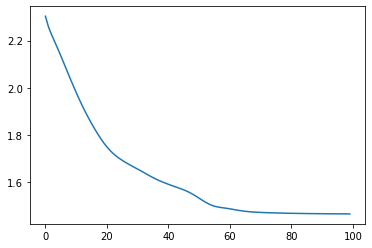

In [226]:
plt.plot(losses)
plt.show()

In [227]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [1.7202537e-03 9.9355257e-01 3.9423723e-04 1.4508226e-04 1.7301072e-03
 3.4719653e-04 9.1791888e-05 5.3268520e-04 9.8394579e-04 5.0222385e-04]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9833333333333333


## 1-2. Ï∏µ ÌïòÎÇò Ï§ÑÏù¥Í∏∞
2 hidden(398, 30) + Sigmoid ÌôúÏÑ±Ìôî Ìï®Ïàò

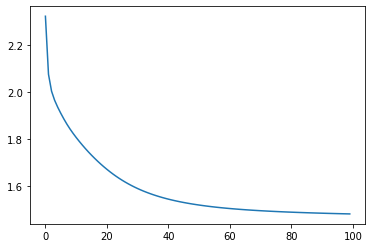

In [240]:
plt.plot(losses)
plt.show()

In [239]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.00365305 0.98859197 0.00788808 0.00468231 0.00834613 0.02571318
 0.0155115  0.01803498 0.02628222 0.02364821]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9833333333333333


### 1-2-1. Ï∏µ Îâ¥Îü∞ Ïàò Î∞îÍæ∏Í∏∞(Ï§ÑÏù¥Í∏∞)

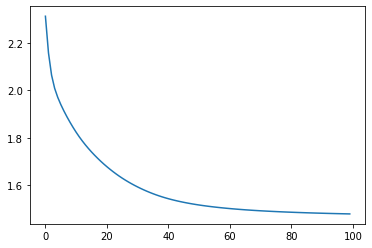

In [250]:
plt.plot(losses)
plt.show()

In [249]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.00947441 0.99182457 0.00881015 0.01153589 0.02684061 0.00286122
 0.01517433 0.01179624 0.00450912 0.02889114]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9814814814814815


### 1-2-2. Ï∏µ Îâ¥Îü∞ Ïàò Î∞îÍæ∏Í∏∞(ÎäòÏù¥Í∏∞)

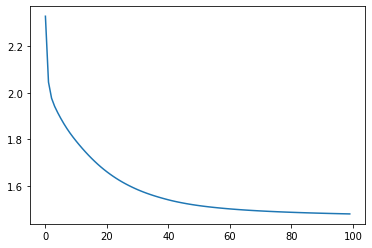

In [258]:
plt.plot(losses)
plt.show()

In [259]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.01636683 0.9904635  0.01630913 0.01253727 0.03101692 0.00511077
 0.00831614 0.03002642 0.01351622 0.01288398]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9851851851851852


#### 1-2-2-1. ÌôúÏÑ±Ìôî Ìï®Ïàò Î∞îÍæ∏Í∏∞(ReLu)

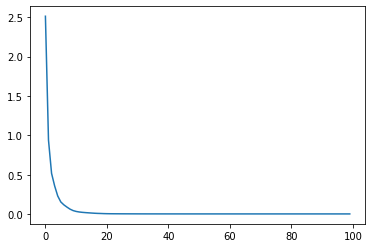

In [280]:
plt.plot(losses)
plt.show()

In [281]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [ 0.        18.092043   2.8417935  0.         0.         8.760982
  0.         0.         1.1731486  0.       ]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9851851851851852


##### üíØ 1-2-2-1-a.ÏòµÌã∞ÎßàÏù¥Ï†Ä(ÌïôÏäµÎ•†) Î∞îÍæ∏Í∏∞(Adam 0.001)


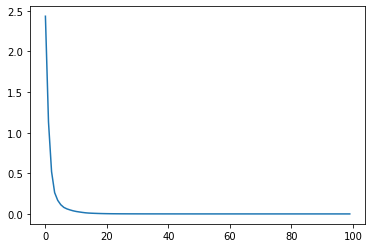

In [362]:
plt.plot(losses)
plt.show()

In [363]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [ 0.        21.773655   5.800887   0.         0.         0.
  5.7476683  0.         0.         6.91699  ]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9888888888888889


##### 1-2-2-1-b(1). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(Adagrad 0.01)

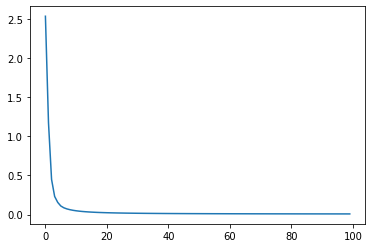

In [323]:
plt.plot(losses)
plt.show()

In [324]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.        8.436815  0.5574618 0.        0.        0.        0.
 0.        0.        2.4941719]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9796296296296296


##### 1-2-2-1-b(2). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(Adagrad 0.001)

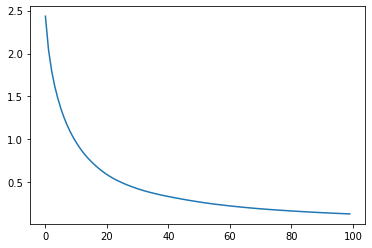

In [344]:
plt.plot(losses)
plt.show()

In [345]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.        5.2973833 2.7224443 0.        0.        0.        2.3633564
 0.        0.        0.       ]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9592592592592593


##### 1-2-2-1-c(1). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(SGD 0.01)

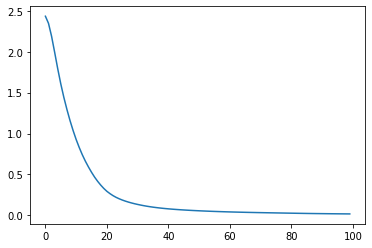

In [384]:
plt.plot(losses)
plt.show()

In [385]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.        7.5738916 3.5013888 0.5965001 0.        0.        1.9200389
 0.        0.        1.6492908]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9703703703703703


##### 1-2-2-1-c(2). ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞îÍæ∏Í∏∞(SGD 0.001)

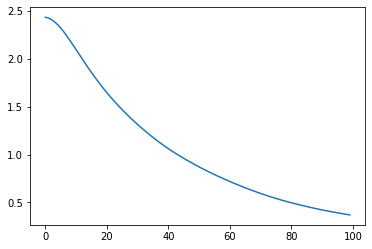

In [405]:
plt.plot(losses)
plt.show()

In [406]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.         2.3399363  1.7269936  0.04952826 0.         0.
 1.9267641  0.         0.         0.        ]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9037037037037037


## 1-3. ÌôúÏÑ±Ìôî Ìï®Ïàò Î∞îÍæ∏Í∏∞(ReLU)

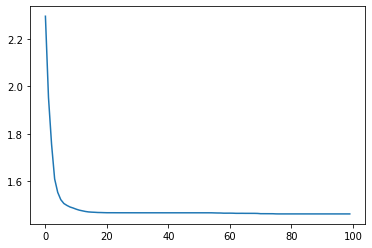

In [291]:
plt.plot(losses)
plt.show()

In [290]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [8.4143939e-30 1.0000000e+00 1.8870449e-18 2.0617633e-20 2.7918450e-23
 6.2566297e-10 2.9173070e-20 3.7665000e-28 6.2837741e-15 4.5830321e-13]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9740740740740741


### batch_size=15

In [146]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [8.9327823e-06 9.9640191e-01 6.1166109e-05 1.1068328e-04 1.3630840e-04
 6.9481792e-04 1.0783077e-03 1.3044401e-04 1.3184415e-03 5.8942198e-05]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9851851851851852


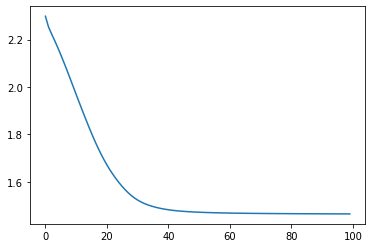

In [144]:
plt.plot(losses)
plt.show()

### batch_size=20

In [135]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [1.5507243e-03 9.9582028e-01 6.1887573e-04 1.5244079e-04 2.9674661e-04
 7.2145398e-04 2.0018584e-05 6.6574034e-04 1.4304733e-04 1.0668883e-05]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9814814814814815


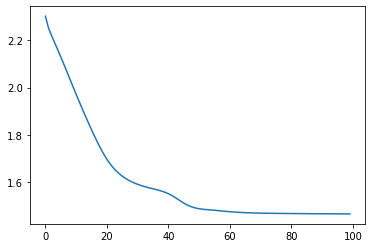

In [157]:
plt.plot(losses)
plt.show()

### batch_size= 100

In [124]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [1.0805618e-04 9.9758911e-01 9.5929507e-05 3.8707312e-05 1.4657037e-04
 1.8043531e-04 3.5024914e-05 5.9061835e-04 1.0809489e-03 1.3457071e-04]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9796296296296296


In [182]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [1.0896160e-04 9.9696380e-01 5.9117231e-04 1.5468025e-04 3.8330072e-05
 5.3152733e-05 1.2024674e-03 1.9882963e-04 6.1159732e-04 7.7100536e-05]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 1
accuracyÎäî 0.9907407407407407


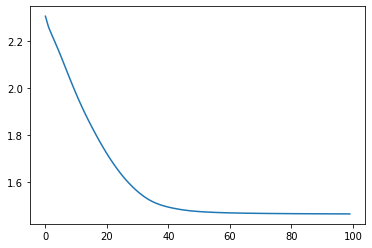

In [181]:
plt.plot(losses)
plt.show()

batch_size Ï°∞Ï†ï Ïãú ÎïåÎßàÎã§ Îã¨ÎùºÏßê. Îã§Î•∏ Ï°∞Ï†ïÍ∞íÏùò Î≥ÄÌôîÏùò ÏùòÎØ∏ ÌååÏïÖÏù¥ Ïñ¥Î†§ÏõåÏßê

# < 3Ï£ºÏ∞® Í≥ºÏ†ú 2 : CNN ÎßõÎ≥¥Í∏∞>
- Part 1ÏóêÏÑú ÏàòÌñâÌñàÎçò Î™®Îç∏Í≥º Ïñ¥Îñ§ Ï†êÏù¥ Îã¨ÎùºÏ°åÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî
- ÏΩîÎìúÎ•º ÏßÅÏ†ë ÌïÑÏÇ¨ Ìï¥Î≥¥ÏãúÍ∏∏ Î∞îÎûçÎãàÎã§.















In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



[**Conv2d**](https://blog.joonas.io/196?category=1016329)(

  **in_channels**,  #ÏûÖÎ†• Ï±ÑÎÑê Ïàò(ÌùëÎ∞± Ïù¥ÎØ∏ÏßÄ=1 / RGB Ïù¥ÎØ∏ÏßÄ=3)

  **out_channels**, #out_channels ÎßåÌÅºÏùò ÌïÑÌÑ∞ÎßÅ Í≤∞Í≥º ÎΩëÏïÑÎÉÑ. ‚è∞ÎÇ¥Î∂ÄÏ†ÅÏù∏ ÌïÑÌÑ∞ Í∞úÏàòÎäî Ïûò Î™®Î•¥Í≤ü/Ïù¥Í≤å ÌïÑÌÑ∞ Í∞úÏàòÏù∏Í±¥Í∞Ä

  kernel_size,  #ÌïÑÌÑ∞Ïùò ÏÇ¨Ïù¥Ï¶à

  stride=1, 

  padding=0)

: 2Ï∞®Ïõê Î∞∞Ïó¥ dataÏóê ÏÇ¨Ïö© (Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•òÏóêÏÑú ÎßéÏù¥ ÏÇ¨Ïö©)





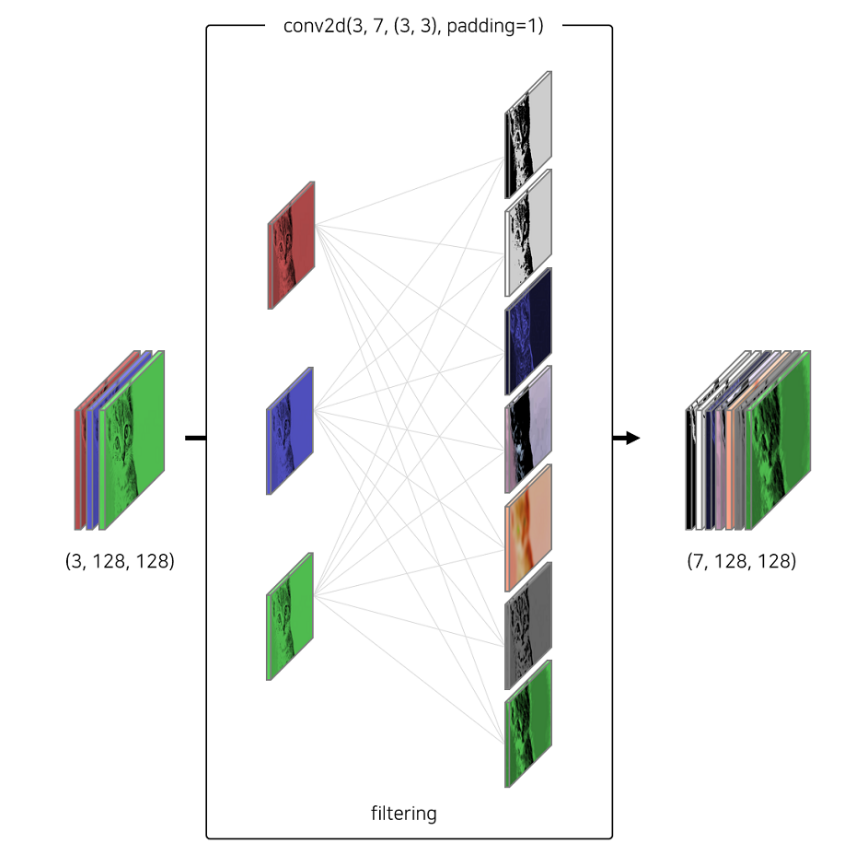

[MNIST ÏòàÏ†úÎ•º ÌÜµÌïú Keras, PyTorch ÎπÑÍµê](https://yong0810.tistory.com/19)

In [3]:
class Net(nn.Module):
  def __init__(self): 
    super(Net, self).__init__()
    # input size = 28x28
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)  # ÌùëÎ∞± ÏÇ¨ÏßÑÏù¥ÎãàÍπå in_channels = 1// 10Í∞úÏùò out channel Ï∂úÎ†•// 5*5 ÌïÑÌÑ∞Î°ú. -> 28-(5-1)= 24. 10Í∞úÏùò 24x24 output
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) 
    self.mp = nn.MaxPool2d(2) #Í≤πÏπòÎäî Î∂ÄÎ∂Ñ ÏóÜÏù¥ Ïù¥Îèô
    self.fc = nn.Linear(320 , 10) ### : ÏïåÎßûÎäî inputÏùÄ? 
    # nn.Linear(input_dim,output_dim)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x))) #(conv1) 24x24 -> (relu) -> (MaxPool2d) : 12x12 .10Í∞ú 
    x = F.relu(self.mp(self.conv2(x))) #(conv2) (12-4) 8x8 -> (relu) -> (Max)  : 4x4 .20Í∞ú
    x = x.view(in_size, -1) #flatten to LinearÏóê ÏßëÏñ¥ÎÑ£Í∏∞
    x = self.fc(x) # 4x4x20 = 320
    return F.log_softmax(x)

In [4]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [5]:
def train(epoch):
  model.train() #train mode: dropout Ïù¥ÎÇò batch_normalization Ïù¥Ïö©
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [6]:
def test():
    model.eval() #model.eval() Ïùò Í∏∞Îä•ÏùÄ?  
                 #evaluate modeÎ°ú Ï†ÑÌôò: dropout Ïù¥ÎÇò batch_normalization Ìï¥Ï†ú 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        # volatile=True ÏòµÏÖòÏùÄ backpropÏùÄ ÌïòÏßÄ ÏïäÍ≥† forward propÎßå Ìï† Îïå ÏÇ¨Ïö©
        # forward propÏùÑ ÌïòÎ©¥ÏÑú ÏßÄÎÇòÍ∞Ñ Î™®Îì† layerÎì§Ïóê ÏûàÎäî activation Í∞íÎì§ÏùÑ Îî∞Î°ú Ï†ÄÏû•ÌïòÏßÄ ÏïäÏùå.

        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy lossÏôÄÏùò Í¥ÄÍ≥Ñ ÌôïÏù∏!
        
        
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

[**Nll_loss ÏôÄ Cross entropy lossÏôÄÏùò Í¥ÄÍ≥Ñ**](https://supermemi.tistory.com/entry/Loss-Cross-Entropy-Negative-Log-Likelihood-%EB%82%B4%EC%9A%A9-%EC%A0%95%EB%A6%AC-Pytorch-Code)

CrossEntropyLoss : LogSoftmax + NegLogLikelihoodLossÍ∞Ä Ìï®Íªò ÏÇ¨Ïö©
- CEL ÏïàÏóêÏÑú LogSoftMax ÏôÄ NLL Ï†ÅÏö©Îê®.
- Ï¶â, Ìï¥Îãπ ÏÜêÏã§Ìï®Ïàò Ï†ÅÏö©Ìïú **Î™®Îç∏**Ïóî SoftMaxÎÇò logÌï®Ïàò Ï°¥Ïû¨ x
- Î™®Îç∏Ïùò ÎßàÏßÄÎßâ layerÏóê SoftMax Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ -> NLLLoss ÏÇ¨Ïö©
 
 + model(NO softmax) -> CEL(softmax, NLL)
 + model(Yes softmax) -> NLL (CEL ÏïàÏùò softmaxÍ∞Ä Î™®Îç∏ÏóêÏÑú Ïù¥ÎØ∏ ÏßÑÌñâÎê®)

In [7]:
for epoch in range(1, 10):
    train(epoch)
    test()

<built-in method size of Tensor object at 0x7fca066ef540>
<built-in method size of Tensor object at 0x7fca066ef400>
<built-in method size of Tensor object at 0x7fca066ef4a0>
<built-in method size of Tensor object at 0x7fca066ef3b0>


<ipython-input-3-ff92cff9787b>:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303159
<built-in method size of Tensor object at 0x7fca066f80e0>
<built-in method size of Tensor object at 0x7fca066f8180>
<built-in method size of Tensor object at 0x7fca066f8130>
<built-in method size of Tensor object at 0x7fca066f8220>
<built-in method size of Tensor object at 0x7fca066ef630>
<built-in method size of Tensor object at 0x7fca066ef860>
<built-in method size of Tensor object at 0x7fca066ef220>
<built-in method size of Tensor object at 0x7fca066efc20>
<built-in method size of Tensor object at 0x7fca066f82c0>
<built-in method size of Tensor object at 0x7fca066f80e0>
<built-in method size of Tensor object at 0x7fca066f8680>
<built-in method size of Tensor object at 0x7fca066f8400>
<built-in method size of Tensor object at 0x7fca066efa40>
<built-in method size of Tensor object at 0x7fca066ef630>
<built-in method size of Tensor object at 0x7fca066ef5e0>
<built-in method size of Tensor object at 0x7fca066efb30>
<built-in method size of Te

<ipython-input-6-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
<built-in method size of Tensor object at 0x7fca0729c130>
<built-in method size of Tensor object at 0x7fca066f8130>
<built-in method size of Tensor object at 0x7fca066f8400>
<built-in method size of Tensor object at 0x7fca066f8220>
<built-in method size of Tensor object at 0x7fca066edf40>
<built-in method size of Tensor object at 0x7fca066edd60>
<built-in method size of Tensor object at 0x7fca066edc70>
<built-in method size of Tensor object at 0x7fca066edef0>
<built-in method size of Tensor object at 0x7fca071f2590>
<built-in method size of Tensor object at 0x7fca071f2310>
<built-in method size of Tensor object at 0x7fca071f2950>
<built-in method size of Tensor object at 0x7fca071f2180>
<built-in method size of Tensor object at 0x7fca066ef9a0>
<built-in method size of Tensor object at 0x7fca066eff40>
<built-in method size of Tensor object at 0x7fca066ef900>
<built-in method size of Tensor object at 0x7f